# Lab 8: matrix equations and linear least-squares fitting

## Matrix operations

We begin today’s lab with a quick investigation of how to use numpy `array`s to represent matrices. We can use the `array` *constructor* function to make a matrix:

In [1]:
import numpy as np

In [2]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[2,0,0],[0,1,0],[0,0,1]])
print(A)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 0 0]
 [0 1 0]
 [0 0 1]]


**Array Shape**

We can examine the shape attribute of the numpy array using the following:

In [3]:
A.shape

(3, 3)

**Array Referencing**

Similarly we can reference individual value in arrays using element indices. These indices must be integers.

These indices generally start with 0.

So the 3x3 matrix A has indicies that run from 0->2 in both dimensions.

In [4]:
A[1,2]

6

In [5]:
A[2,1]

8

Can you explain how this referencing works?

**Assignments**

You can also use references to change the value of elements in an array/matrix.

In [6]:
print(A)
A[1,2] = -1.0
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 4  5 -1]
 [ 7  8  9]]


**Numpy Array Creation**

There are some convenient ways to create numpy arrays

In [7]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [8]:
np.ones([4,2])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

**Array Multiplication**

It is tempting to multiply the matrices by using `*`, but if we try:

In [9]:
print(A*B)

[[2 0 0]
 [0 5 0]
 [0 0 9]]


**Can you explain what has happened?** 

The correct way is to use the `dot` function, or to use the shorthand `@`:

In [10]:
print(A@B)

[[ 2  2  3]
 [ 8  5 -1]
 [14  8  9]]


In [11]:
print(np.dot(A,B))

[[ 2  2  3]
 [ 8  5 -1]
 [14  8  9]]


Numpy is clever enough to interpret a one-dimensional array as either a row or a column matrix depending on the context:

In [12]:
v = np.array([1,0,0])
print(A@v)
print(v@A)

[1 4 7]
[1 2 3]


Many useful matrix manipulation tools are in the `linalg` namespace. Among these, we can find the inverse of a matrix with `inv`:

In [13]:
np.linalg.inv(B)

array([[0.5, 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

(Note as always that we can `import` functions directly into the main namespace if this is too much typing, by evaluating `from numpy.linalg import inv` or whatever.)

Let’s put this to use by solving a matrix equation. Specifically, let’s solve the simultaneous equations
$$\begin{align*}
2x + 3y &= 16 \\
7x - 2y &= 31 \\
\end{align*}
$$
or, equivalently,
$$
\begin{pmatrix}2 & 3 \\ 7 & -2\end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} =
\begin{pmatrix}16 \\ 31\end{pmatrix}.
$$

The obvious way is to use the matrix inverse:
$$
\begin{pmatrix}x \\y \end{pmatrix} =
\begin{pmatrix}2 & 3 \\ 7 & -2\end{pmatrix}^{-1}
\begin{pmatrix}16 \\ 31\end{pmatrix}.
$$
**Use the matrix commands we’ve just learned to evaluate the RHS of this equation.**

In [14]:
from numpy.linalg import inv
A = np.array([[2,3],[7,-2]])
B = np.array([[16],[31]])
[[x],[y]] = np.linalg.inv(A)@B
print([x,y])

[5.0, 2.0000000000000004]


Another option is to use the `linalg.solve` function, which exists specifically to solve matrix equations of the form $\mathbf{Ax} = \mathbf{b}$. It takes two arguments, the matrix $\mathbf{A}$ and the vector $\mathbf{b}$. **Check that you get the same answer using this method:**

In [15]:
# Define suitable A and b here
M = np.array([[2,3],[7,-2]])
v = [[16],[31]]
np.linalg.solve(M, v)

array([[5.],
       [2.]])

Let’s compare the performance of these two commands on larger matrices. To generate a big matrix easily, we use the `rand` function, which lives in the `random` namespace in `numpy`. Calling `np.random.rand(20)` will return an `array` of 20 random numbers between 0 and 1, and similarly `np.random.rand(100,100)` will return a $100\times 100$ `array`.

Use the `%timeit` “magic” command to **compare the speeds of these two methods for matrices of suitable sizes**: you should be able to get up to at least $1000\times 1000$.

(*Hint*: The easiest way to use this is just to put `%timeit` before the command you want to time.)

**Extension**: A more sophisticated method is to write something like

    mytime = %timeit -o some_command()

which will store a range of information about the timing in the variable `mytime`. The time taken for each of several runs will be stored as `mytime.all_runs`. Use this information to **calculate the average time taken, and plot this against matrix size on a log-log graph.**

In [16]:
mytime = %timeit -o np.random.rand(20)
mytime = %timeit -o np.random.rand(100,100)
mytime = %timeit -o np.random.rand(1000,1000)
mytime = %timeit -o np.random.rand(10000,10000)
mytime.all_runs

1.11 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
83.7 µs ± 451 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
11.8 ms ± 82.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.21 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


[1.2321256999999832,
 1.1921385000000555,
 1.213897799999927,
 1.1983571000000666,
 1.2199479000000792,
 1.2057053000000906,
 1.2071311999999352]

▶ **CHECKPOINT 1**

## Linear least-squares fitting to polynomials

First, we need some data to fit. The code below defines some example data; let's start by **plotting it**.

In [17]:
x = np.array([  0.        ,   0.52631579,   1.05263158,   1.57894737,
                2.10526316,   2.63157895,   3.15789474,   3.68421053,
                4.21052632,   4.73684211,   5.26315789,   5.78947368,
                6.31578947,   6.84210526,   7.36842105,   7.89473684,
                8.42105263,   8.94736842,   9.47368421,  10.        ])
y = np.array([ -23.65721091,  129.96285988,  316.40610918,  435.59305751,
               554.44335211,  614.02561442,  698.64885428,  792.92150483,
               857.4523591 ,  886.46905968,  901.03562214,  873.93486904,
               829.10300783,  784.39562338,  725.48999232,  609.56149829,
               493.30269619,  360.81172505,  203.03897181,   -5.83555244])

In [18]:
from pylab import plot, xlabel, ylabel, figure
xlabel('X values')
ylabel('Y values')
plot(x,y)
figure()
sum(x**2e1)

1.491120650270532e+20

We saw in class that the best-fitting polynomial of order $k$ to a given data set has coefficients $(a_0, a_1, \dots, a_k)$ that satisfy the matrix equation
$$
\begin{pmatrix}
N & \sum_i x_i & \sum_i x_i^2 & \dots & \sum_i x_i^k \\
\sum_i x_i & \sum_i x_i^2 & \sum_i x_i^3 & \dots & \sum_i x_i^{k+1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum_i x_i^k & \sum_i x_i^{k+1} & \sum_i x_i^{k+2} & \dots & \sum_i x_i^{2k} \\
\end{pmatrix}
\begin{pmatrix} a_0 \\ a_1 \\ \vdots \\ a_k\end{pmatrix}
=
\begin{pmatrix} \sum_i y_i \\ \sum_i x_iy_i \\ \vdots \\ \sum_i x_i^k y_i\end{pmatrix}.
$$

**Write functions `coefficient_matrix(x, k)` and `constant_matrix(x, y, k)` to calculate, respectively, the square matrix on the LHS and the vector on the RHS.** Here `x` and `y` are 1D numpy `array`s of data, and as in the equation above `k` is the order of polynomial to fit to.

*Hint:* We can use the fact that mathematical operations on `array`s are evaluated elementwise to our advantage. For instance, $\sum_i x_i^2 y_i$ can be written in Python as `sum(x**2 * y)` – can you see why?

In [19]:
def coefficient_matrix(x, k):
    """Documentation string goes here"""
    c = np.zeros([k+1,k+1])
    for o in range(k + 1):
        for i in range(k + 1):
            c[o,i] = sum(x**(i+o))
    return c

def constant_matrix(x, y, k):
    """Documentation string goes here"""
    d = []
    for i in range(k+1):
        summation = sum((x**i) *y)
        d.append([summation])
    d = np.array(d)
    return d

In [29]:
print(coefficient_matrix(x,10))
print(constant_matrix(x,y,10))

[[20.]]
[[1.10371040e+04]
 [5.66202156e+04]
 [3.43936825e+05]
 [2.30943131e+06]
 [1.65631296e+07]
 [1.24471937e+08]
 [9.68577246e+08]
 [7.74275016e+09]
 [6.32334892e+10]
 [5.25457691e+11]
 [4.42947625e+12]]


To start with, let’s look for a quadratic solution, $k = 2$. **Use the `solve` function, together with the matrix functions you just defined, to find the coefficients of the best quadratic fit to these data.**

In [23]:
quadratic_coefficients = np.linalg.solve(coefficient_matrix(x,2), constant_matrix(x,y,2))
print(quadratic_coefficients)

[[-49.62846989]
 [364.06490585]
 [-35.62765588]]


To make your life a bit easier, I’ve defined a Python function that will evaluate a polynomial with given coefficients. Check that you understand how the function below works. Using it and the coefficients you’ve just found, **plot the data together with your fit to them and the *residual* (*i.e.*, the difference between data and fit).**

In [22]:
def y_fitted(x, coefficients):
    return sum([c*x**i for i, c in enumerate(coefficients)])

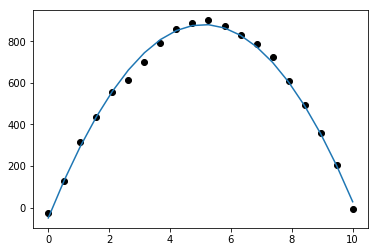

In [23]:
from pylab import plot, figure, legend, xlabel, ylabel
from numpy import linspace
y2 = y_fitted(x,quadratic_coefficients)
plot(x, y, 'ok')
plot(x, y2)

▶ **CHECKPOINT 2**

We now need some measure of how good the fit is. One such measure is the *reduced chi-squared*, which is simply the sum of the squared residuals divided by the number of *degrees of freedom* – that is, the number of parameters we have fitted:

$$
\chi^2_\text{red} = \frac{\sum_i(y_\text{fitted} - y_\text{observed})^2}{k + 1}.
$$

**Write a function `chi_squared(x, y, coefficients)` to calculate the reduced chi-squared. Evaluate this for your quadratic fit.** 

*Hint:* if you can, try to make your function independent of the number of coefficients so that you can reuse it for a fit that is not quadratic. The denominator $k+1$ is the size of `coefficients`: use `coefficients.size` or `len(coefficients)`.

In [24]:
def chi_squared(x, y, coefficients):
    """Documentation string here."""
    return sum((y_fitted(x, coefficients) - y)**2) / len(coefficients)

In [29]:
chi_squared(x, y, quadratic_coefficients)
cubic_coefficients = np.linalg.solve(coefficient_matrix(x,3), constant_matrix(x,y,3))
print(chi_squared(x,y,cubic_coefficients))
print(chi_squared(x,y,quadratic_coefficients))

1045.9115539850202
2872.5969514796584


**Try higher-order fits (cubic, quartic, …). How does the $\chi^2$ value change?**

▶ **CHECKPOINT 3**